## Exercise 8-2

In order to plot the sampling distribution for the exponential distribution Estimate3 I am re-writting the function so that we get L returned from function and call it Estimate4

In [8]:
import thinkstats2
import thinkplot

import math
import numpy as np

%matplotlib inline

In [9]:
def RMSE(estimates, actual):
    e2 = [(estimate - actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return math.sqrt(mse)

def MeanError(estimates, actual):
    errors = [estimate - actual for estimate in estimates]
    return np.mean(errors)

In [10]:
def Estimate4(n=10, m=1000):
    lam = 2
    
    means = []
    medians = []
    for _ in range(m):
        xs = np.random.exponential(1.0/lam, n)
        L = 1 / np.mean(xs)
        Lm = math.log(2) / thinkstats2.Median(xs)
        means.append(L)
        medians.append(Lm)
    
    return means,medians
    
meansExpDist, mediansExpDist = Estimate4()

Here is sampling distribution of L, an estimator for lam [can be thought of the rate at which events happen]. 1/lam gives the mean of the exponential distribution.

standard error:  0.7795870527633975
confidence interval:  (1.280727726640106, 3.6020281504942462)


C:\Python34\lib\site-packages\matplotlib\axes\_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


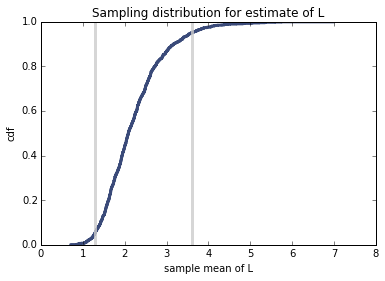

In [12]:
cdfExp = thinkstats2.Cdf(meansExpDist)
ciExp = cdfExp.Percentile(5), cdfExp.Percentile(95)

# lam = 2 and we are calculating the standard error for lam estimator L. 
strError = RMSE(meansExpDist, 2)

print('standard error: ', strError)
print('confidence interval: ', ciExp)
    
# printing the cdf
thinkplot.Cdf(cdfExp)
# print vertical lines for the confidence interval
thinkplot.Plot([ciExp[0],ciExp[0]],[0,1], color='0.8', linewidth=3)
thinkplot.Plot([ciExp[1],ciExp[1]],[0,1], color='0.8', linewidth=3)
thinkplot.Show(xlabel='sample mean of L',
               ylabel='cdf',
              title='Sampling distribution for estimate of L')

Now for the part of question regarding choosing differen values of n and plotting standard error vs. n

C:\Python34\lib\site-packages\matplotlib\axes\_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


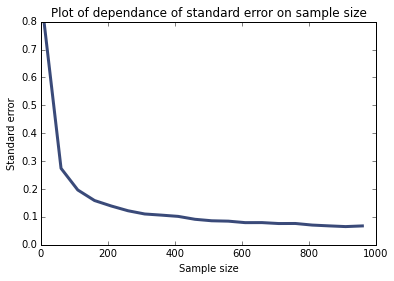

In [13]:
nList = []
stdErrorList = []

for i in range(1,100,5):
    L,_ = Estimate4(i*10,1000)
    stdErrorCalc = RMSE(L,2)
    nList.append(i*10)
    stdErrorList.append(stdErrorCalc)
    
thinkplot.Plot(nList, stdErrorList)
thinkplot.Show(xlabel='Sample size',
              ylabel='Standard error',
              title='Plot of dependance of standard error on sample size')

## Exercise 8-3

In [16]:
def gameSimulate(lam):
    '''
    given lam [approximate rate of goals/game] function will generate number of goals in a game
    
    - return value is total goals scored in a game
    - time stops when greater than 1
    '''
    numGoals = 0
    t = 0
    
    while True:
        beta = 1/lam
        tBetweenGoals = np.random.exponential(beta)
        t += tBetweenGoals
        if t>1:
            break
        numGoals += 1
        
    return numGoals

def multipleGameSimulator(lam, m):
    
    '''
    we are going to run above function m times, stores estimate of L and prints mean error and RMSE
    '''
    estimateOfL = []
    
    for i in range(m):
        L = gameSimulate(lam)
        estimateOfL.append(L)
        
    return estimateOfL, MeanError(estimateOfL, lam), RMSE(estimateOfL, lam)
        
_, meanError, rmseError = multipleGameSimulator(2,10000)
print('L estimate mean error: ', meanError)
print('L estimate RMSE error: ', rmseError)

L estimate mean error:  0.0106
L estimate RMSE error:  1.417603611733548


C:\Python34\lib\site-packages\matplotlib\axes\_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


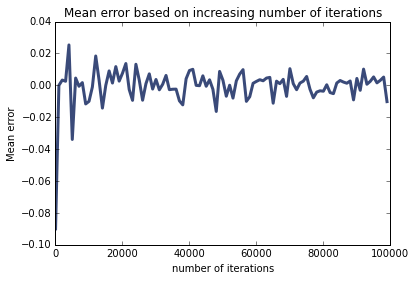

In [17]:
mList = []
meanErrorList = []

lam = 2

for m in range(100,100000,1000):
    estimateOfL, _, _ = multipleGameSimulator(lam,m)
    meanErrorList.append(MeanError(estimateOfL, lam))
    mList.append(m)
    
thinkplot.Plot(mList, meanErrorList)
thinkplot.Show(xlabel='number of iterations',
              ylabel='Mean error',
              title='Mean error based on increasing number of iterations')

Since as m increases we find that mean error is decreasing to zero. Hence, it seems that L is an unbiased estimator of lamda.

#### Now we are going to plot the sampling distribution of L and put in the confidence interval in the plot.

standard error for estimate of L:  1.387984149765407


C:\Python34\lib\site-packages\matplotlib\axes\_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


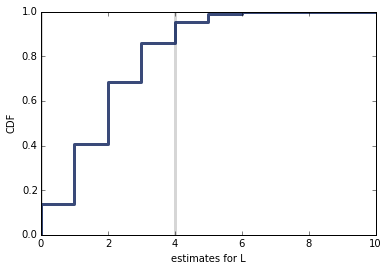

In [18]:
meansL, _, _ = multipleGameSimulator(2,10000)
cdfL = thinkstats2.Cdf(meansL)
ciL = cdfL.Percentile(5), cdfL.Percentile(95)
stdErrorL = RMSE(meansL, lam)
print('standard error for estimate of L: ', stdErrorL)

thinkplot.Plot([ciL[0],ciL[0]],[0,1], color='0.8', linewidth=3)
thinkplot.Plot([ciL[1],ciL[1]],[0,1], color='0.8', linewidth=3)
thinkplot.Cdf(cdfL)
thinkplot.Show(xlabel='estimates for L',
              ylabel='CDF')

C:\Python34\lib\site-packages\matplotlib\axes\_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


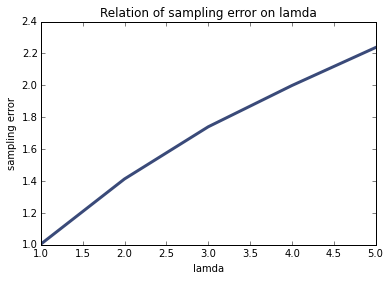

In [19]:
stdErrorList2 = []

for i in range(1,6):
    meansL2, _, _ = multipleGameSimulator(i,10000)
    stdError2 = RMSE(meansL2, i)
    stdErrorList2.append(stdError2)
    
thinkplot.Plot(range(1,6),stdErrorList2)
thinkplot.Show(xlabel='lamda',
              ylabel='sampling error',
              title='Relation of sampling error on lamda')

It seems that the model breaks down if the number of goals per unit time (on average) increases. 